In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
cluster_df = pd.read_csv(os.path.join('../cluster/l2_norm_KMeans.csv'),
                              sep=';')
cluster_df = cluster_df.set_index('Songs')
pprint(cluster_df.index.tolist())

['1 - Bach - Air.mp3',
 '1 - Beethoven - Claro de Luna.mp3',
 '1 - Beethoven - Fur Elise.mp3',
 '1 - Mozart - Lacrimosa.mp3',
 '1 - Mozart - Serenata Nocturna.mp3',
 '2 - Creedence Clearwater Revival  Proud Mary.mp3',
 '2 - Dreams - Fleetwood Mac.mp3',
 '2 - Have You Ever Seen The Rain  - Creedence Clearwater Revival.mp3',
 '2 - Hey Jude - The Beatles.mp3',
 '2 - House Of The Rising Sun - The Animals.mp3',
 '2 - Me & Bobby McGee - Janis Joplin.mp3',
 '2 - Somebody to love - Jefferson airplane.mp3',
 '2 - Sweet Home Alabama - Lynyrd Skynyrd.mp3',
 '2 - The Weight - The Band.mp3',
 '2 - Under pressure - Queen.mp3',
 '2 - Van Morrison - Brown Eyed Girl (Outlier).mp3',
 '3 - A-ha - Take On Me.mp3',
 '3 - Berlin - Take My Breath Away.mp3',
 '3 - Culture Club - Karma Chameleon.mp3',
 '3 - Cyndi Lauper - Girls Just Want To Have Fun.mp3',
 '3 - Kenny Loggins - Footloose.mp3',
 '3 - Madonna - Like a Virgin.mp3',
 '3 - Michael Jackson - Billie Jean.mp3',
 '3 - Rick Astley - Never gonna give you 

In [3]:
dist_df = cluster_df.drop(columns=['Cluster'])

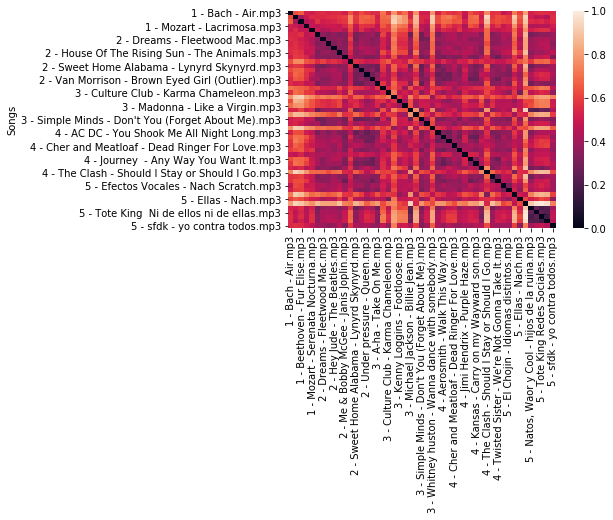

In [4]:
fig, ax = plt.subplots()
sns.heatmap(dist_df)
#fig.subplots_adjust(left=0.35,
#                    bottom=0.35,
#                    right=1.0,
#                    top=0.95)
#plt.axis('off')
plt.show()

In [5]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dist_df)

In [6]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'],
                          index=dist_df.index)

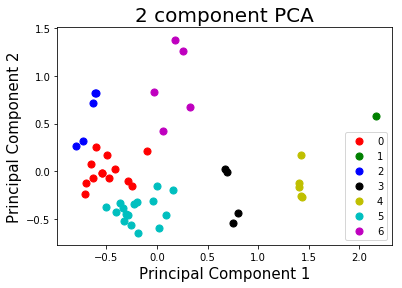

In [7]:
fig, ax = plt.subplots()
targets = np.unique(cluster_df['Cluster'].values)
colors = ['r', 'g', 'b', 'k', 'y', 'c', 'm']
for target, color in zip(targets, colors):
    indicesToKeep = cluster_df['Cluster'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)

## For plotting song names
#for song in principalDf.index:
#    x = principalDf.loc[song, 'principal component 1']
#    y = principalDf.loc[song, 'principal component 2']
#    if np.random.rand() >= 0.87:
#        ax.annotate('%s' % song, xy=(x,y), xytext=(x+0.1, y), textcoords='data')

ax.legend(targets)
#ax.grid()
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
#legend = ax.legend()
#legend.remove()
plt.show()
#print(cluster_df.sort_values('Cluster')['Cluster'])